<a href="https://colab.research.google.com/github/AndrewstheBuilder/ScratchNeuralNetworks/blob/main/Pytorch_CNN_KaggleDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!kaggle datasets download -d puneet6060/intel-image-classification
!unzip intel-image-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

In [2]:
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [3]:
transform = transforms.Compose(
    [ transforms.Resize((64, 64)),
      transforms.ToTensor(),
      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_data_path = './seg_train/seg_train/'
train_dataset = datasets.ImageFolder(root=train_data_path, transform=transform)

test_data_path = './seg_test/seg_test/'
test_dataset = datasets.ImageFolder(root=test_data_path, transform=transform)

In [4]:
batch_size = 32 # You can adjust the batch size based on memory availability
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
classes = train_dataset.classes

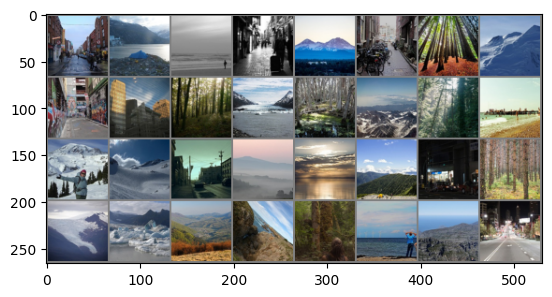

street glacier sea   street mountain street forest glacier street buildings forest glacier forest mountain forest sea   glacier glacier street mountain sea   mountain street forest glacier glacier mountain sea   forest sea   mountain street


In [6]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
classes = train_dataset.classes

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [60]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 5, padding='same')
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 5, padding='same')
        self.conv3 = nn.Conv2d(64, 128, 5, padding='same')
        self.fc1 = nn.Linear(128 * 8 * 8, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, len(classes))

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [61]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
epochs=10

In [62]:
for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        # for name, param in net.named_parameters():
        #   if param.requires_grad:
        #       print(f'{name} grad: {param.grad.abs().mean()}')
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 32 == 31:    # print every 32 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 32:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,    32] loss: 1.795
[1,    64] loss: 1.789
[1,    96] loss: 1.791
[1,   128] loss: 1.784
[1,   160] loss: 1.781
[1,   192] loss: 1.774
[1,   224] loss: 1.765
[1,   256] loss: 1.747
[1,   288] loss: 1.713
[1,   320] loss: 1.616
[1,   352] loss: 1.502
[1,   384] loss: 1.433
[1,   416] loss: 1.393
[2,    32] loss: 1.349
[2,    64] loss: 1.326
[2,    96] loss: 1.257
[2,   128] loss: 1.208
[2,   160] loss: 1.189
[2,   192] loss: 1.166
[2,   224] loss: 1.225
[2,   256] loss: 1.180
[2,   288] loss: 1.112
[2,   320] loss: 1.113
[2,   352] loss: 1.062
[2,   384] loss: 1.052
[2,   416] loss: 1.097
[3,    32] loss: 1.030
[3,    64] loss: 1.136
[3,    96] loss: 1.037
[3,   128] loss: 1.060
[3,   160] loss: 0.954
[3,   192] loss: 0.984
[3,   224] loss: 1.045
[3,   256] loss: 0.969
[3,   288] loss: 0.967
[3,   320] loss: 0.977
[3,   352] loss: 1.045
[3,   384] loss: 1.010
[3,   416] loss: 0.988
[4,    32] loss: 0.974
[4,    64] loss: 1.005
[4,    96] loss: 0.967
[4,   128] loss: 0.966
[4,   160] 

In [54]:
print('labels',labels)
classes = train_dataset.classes
print('classes',classes)
t = torch.tensor([[[1, 2],[3, 4]],[[5, 6],[7, 8]]])
print('t.shape',t.shape)
t_flat = torch.flatten(t, 1)
print('t_flat.shape',t_flat.shape)

labels tensor([3, 1, 2, 5, 3, 5, 1, 0, 2, 0, 1, 1, 2, 3, 0, 2, 1, 0, 4, 2, 4, 5, 2, 4,
        2, 4, 0, 1, 1, 0, 5, 4])
classes ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
t.shape torch.Size([2, 2, 2])
t_flat.shape torch.Size([2, 4])


In [63]:
PATH = './kaggle_net.pth'
torch.save(net.state_dict(), PATH)

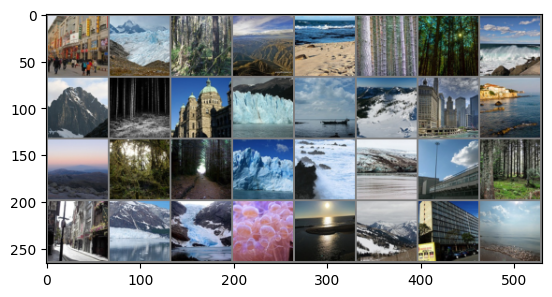

GroundTruth:  street glacier forest mountain


In [64]:
dataiter = iter(test_loader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [65]:
net = Net()
net.load_state_dict(torch.load(PATH, weights_only=True))

<All keys matched successfully>

In [66]:
outputs = net(images)

In [67]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  street mountain forest mountain


In [68]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 73 %


In [69]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: buildings is 66.6 %
Accuracy for class: forest is 90.9 %
Accuracy for class: glacier is 72.3 %
Accuracy for class: mountain is 79.8 %
Accuracy for class: sea   is 61.0 %
Accuracy for class: street is 70.5 %
